# spaCy

spaCy es una biblioteca gratuita de código abierto para el NLP en Python.

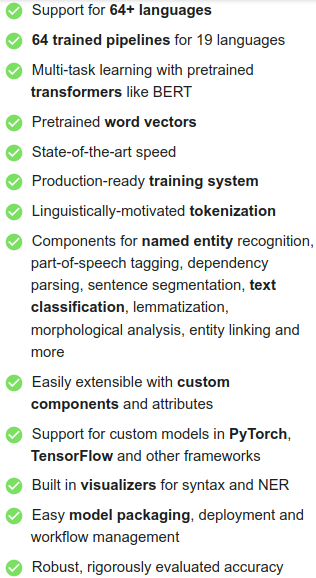

In [1]:
from IPython.display import Image
Image(filename = "spacy_funcionalidades_1.png")

In [2]:
# Importa spaCy
import spacy

spacy.__version__

'3.1.3'

**El objeto nlp**

In [3]:
# Crear un objeto nlp vacío para procesar español
nlp = spacy.blank("es")

El objeto `nlp` creado con el método `spacy.blank` genera un pipeline vacío. El contiene, por ejemplo, reglas de casos especiales para la tokenización, stop words o funciones para decidir si una palabra como "veintidós" se parece a un número.

**El objeto Doc**

In [4]:
# Procesar un texto. Doc (de "documento") es creado después de procesar un texto con el objeto nlp
doc = nlp("¿Cómo estás?")

El `Doc` permite acceder a la información sobre el texto en una forma estructurada y sin perder información. Se comporta como una secuencia de Python y te permite iterar sobre sus tokens

**El objeto Token**

Estos objetos proveen varios atributos que permiten acceder a más información sobre los mismos.

In [5]:
# Indexa el Doc para obtener un Token. Selecciona el segundo token:
token = doc[1]

# Obtén el texto del token a través del atributo .text
print(token.text)

Cómo


In [6]:
# Iterar en los tokens del Doc
for token in doc:
    print(token.text)

¿
Cómo
estás
?


**El objeto Span**

Es un slice de un documento compuesto por uno o más tokens. Es solo un view de un `Doc` y no contiene los datos en sí.

In [7]:
# Un slice (partición) de un Doc es un objeto Span
span = doc[1:3]

# Obtener el texto del span con el atributo .text
print(span.text)

Cómo estás


In [8]:
# Imprimir el texto del documento  
print(doc.text)

¿Cómo estás?


**Atributos Léxicos**

Atributos disponibles de los tokens. Se refieren a una entrada en el vocabulario y no dependen del contexto del token.

In [9]:
doc = nlp("En cien mil millones de galaxias, no hallarías otro igual.")

print("Index:   ", [token.i for token in doc]) # índice del token dentro del documento
print("Text:    ", [token.text for token in doc]) # texto del token
print("is_alpha:", [token.is_alpha for token in doc]) # un token está compuesto de caracteres alfabéticos?
print("is_punct:", [token.is_punct for token in doc]) # es un signo de puntuación?
print("like_num:", [token.like_num for token in doc]) # parece ser un número?

Index:    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Text:     ['En', 'cien', 'mil', 'millones', 'de', 'galaxias', ',', 'no', 'hallarías', 'otro', 'igual', '.']
is_alpha: [True, True, True, True, True, True, False, True, True, True, True, False]
is_punct: [False, False, False, False, False, False, True, False, False, False, False, True]
like_num: [False, True, True, False, False, False, False, False, False, False, False, False]


## Modelos Estadísticos

* Pipelines entrenados permiten a spaCy predecir **atributos lingüísticos** en contexto: etiquetado gramatical, dependencias sintácticas (relaciones entre las palabras, por ejemplo, si una palabra es el sujeto o el objeto de una oración) y entidades nombradas. Son entrenados con datasets de textos de ejemplos anotados.
* Paquetes de pipelines pre-entrenados pueden ser descargos usando el comando:
`$ python -m spacy download es_core_news_sm`
* El método `spacy.load`carga el paquete del pipeline y retorna un objeto `nlp`.
* El paquete provee: los parámetros binarios que le permiten a spaCy hacer predicciones, el vocabulario, metadatos (lenguaje, pipeline) y el archivo de configuración utilizado para entrenarlo.

In [10]:
#!python -m spacy download es_core_news_sm
#!python -m spacy download es_core_news_md
#!python -m spacy download es_core_news_lg

**Predicción de etiquetas gramaticales**

* `.pos_`: Etiqueta gramatical.
* `.dep_`: Etiqueta de la dependencia sintáctica predicha.
* `.head`: Token padre al que la palabra está atada.

In [11]:
import spacy

# Carga el modelo pequeño de Español
nlp = spacy.load("es_core_news_sm")

# Procesa un texto
doc = nlp("Un punto azul pálido casi perdido en un inmenso mar de estrellas.")

# Itera en los tokens
for token in doc:
    # Imprime el texto, la clase gramatical, dependencia sintáctica y head de un token
    print(f"{token.text:<12}{token.pos_:<10}{token.dep_:<10}{token.head.text:<10}")

Un          DET       det       punto     
punto       NOUN      ROOT      punto     
azul        ADJ       amod      punto     
pálido      ADJ       amod      punto     
casi        ADV       advmod    perdido   
perdido     ADJ       amod      punto     
en          ADP       case      mar       
un          DET       det       mar       
inmenso     ADJ       amod      mar       
mar         NOUN      nmod      punto     
de          ADP       case      estrellas 
estrellas   PROPN     flat      mar       
.           PUNCT     punct     punto     


In [12]:
from spacy import displacy

displacy.render(doc, style = "dep", jupyter = True)

In [13]:
import spacy

nlp = spacy.load("es_core_news_sm")
doc = nlp("Lima es una ciudad muy poblada.")

# Itera en los tokens
for token in doc:
    # Verifica si el token atual es un sustantivo propio.
    if token.pos_ == "PROPN":
        if token.i + 1 < len(doc):
            # Verifica si el próximo token es un verbo auxiliar
            if doc[token.i + 1].pos_ == "AUX":
                print("Nombre propio encontrado antes de un verbo auxiliar:", token.text)

Nombre propio encontrado antes de un verbo auxiliar: Lima


**Prediciendo entidades nombradas**

* `doc.ents`: Accede a las entidades nombradas predichas por el modelo de reconocimiento de entidades. Devuelve un iterador de objetos `Span`.

In [14]:
import spacy

nlp = spacy.load("es_core_news_sm")

# Procesa un texto
doc = nlp("La NASA seleccionó a la empresa SpaceX, de Elon Musk, "
          "para construir la nave con la que planea volver a llevar humanos a la Luna en esta década.")

# Itera sobre las entidades predichas
for ent in doc.ents:
    # Imprimir el texto de la entidad y su etiqueta    
    print(ent.text, ent.label_)

NASA ORG
SpaceX MISC
Elon Musk PER
la Luna LOC


In [15]:
from spacy import displacy

displacy.render(doc, style = "ent", jupyter = True)

**Método spacy.explain**

Permite obtener definiciones de las etiquetas más comunes.

In [16]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

In [17]:
spacy.explain("MISC")

'Miscellaneous entities, e.g. events, nationalities, products or works of art'

In [18]:
spacy.explain("PER")

'Named person or family.'

In [19]:
spacy.explain("LOC")

'Non-GPE locations, mountain ranges, bodies of water'

In [20]:
spacy.explain("NNP")

'noun, proper singular'

In [21]:
spacy.explain("GPE")

'Countries, cities, states'

In [22]:
spacy.explain("nsubj")

'nominal subject'

In [23]:
spacy.explain("dobj")

'direct object'

In [24]:
spacy.explain("PROPN")

'proper noun'

In [25]:
spacy.explain("DET")

'determiner'

## Combinando Modelos y Reglas

| | Modelos Estadísticos | Sistemas Basados en Reglas |
|---|---|---|
| **Casos de uso** | Útiles si tu aplicación necesita generalizar a partir de pocos ejemplos | Útiles si hay un número más o menos finito de casos que quieres encontrar|
| **Ejemplos de la vida real** | Detectar nombres de productos, nombres de personas, relaciones sujeto/objeto | Países del mundo, ciudades, nombres de remedios, razas caninas |
| **Recursos de spaCy** | Entity recognizer, dependency parser, part-of-speech tagger | Regla de tokenización personalizada, `Matcher`, `PhraseMatcher` |

**Matcher**

* La clase `Matcher` permite escribir reglas para encontrar palabras y frases en el texto.
* A diferencia de expresiones regulares, permite buscar patrones en objetos `Doc`, no solamente en strings. Esto quiere decir que las reglas pueden usar las predicciones del modelo, por ejemplo, encontrar una palabra únicamente si es un verbo y no un sustantivo.

* Atributos que `Matcher` reconoce:

| ATTRIBUTE | TYPE | DESCRIPTION |
| --- | --- | --- |
| ORTH | unicode | The exact verbatim text of a token. |
| TEXT | unicode | The exact verbatim text of a token. |
| LOWER | unicode | The lowercase form of the token text. |
| LENGTH | int | The length of the token text. |
| IS_ALPHA, IS_ASCII, IS_DIGIT | bool | Token text consists of alphabetic characters, ASCII characters, digits. |
| IS_LOWER, IS_UPPER, IS_TITLE | bool | Token text is in lowercase, uppercase, titlecase. |
| IS_PUNCT, IS_SPACE, IS_STOP | bool | Token is punctuation, whitespace, stop word. |
| IS_SENT_START | bool | Token is start of sentence. |
| LIKE_NUM, LIKE_URL, LIKE_EMAIL | bool | Token text resembles a number, URL, email. |
| POS, TAG, DEP, LEMMA, SHAPE | unicode | The token's simple and extended part-of-speech tag dependency label, lemma, shape. |
| ENT_TYPE | unicode | The token's entity label. |

* Operadores similares a expresiones regulares

| OP | DESCRIPTION |
| --- | --- |
| ! | Negate the pattern, by requiring it to match exactly 0 times. |
| ? | Make the pattern optional, by allowing it to match 0 or 1 times. |
| + | Require the pattern to match 1 or more times. |
| * | Allow the pattern to match zero or more times. |

* Soporte de sintaxis extendido

| ATTRIBUTE	| VALUE TYPE | DESCRIPTION |
| --- | --- | --- |
| IN | any | Attribute value is member of a list. |
| NOT_IN | any | Attribute value is not member of a list. |
| ==, >=, <=, >, < | int, float | Attribute value is equal, greater or equal, smaller or equal, greater or smaller. |

In [26]:
import spacy

# Importa el Matcher (comparador)
from spacy.matcher import Matcher

# Carga el modelo y crea un objeto nlp
nlp = spacy.load("es_core_news_sm")

# Inicializa el matcher con el vocabulario compartido
matcher = Matcher(nlp.vocab)

# Adiciona expresiones (listas de diccionarios describiendo los tokens) al matcher

un = ["km", "au"]
pattern = [{"POS": "NUM"}, 
           {"OP": "?", "TEXT": {"IN": un}}, 
           {"LOWER": {"IN": ["a", "hasta", "-"]}}, 
           {"POS": "NUM"}, 
           {"TEXT": {"IN": un}}     
           ]

pattern_2 = [{"POS": "NUM"},
             {"TEXT": {"IN": un}}
             ]

planets = ["Mercurio", "Venus", "Tierra", "Marte", "Júpiter", "Saturno", "Urano", "Neptuno"]
pattern_3 = [{"TEXT": {"IN": planets}}]
pattern_3_2 = [{"TEXT": "Planeta"},
               {"TEXT": {"IN": ["9", "Nueve"]}}
               ]

pattern_4 = [{"TEXT": '"'},
             {"OP": "*"},
             {"TEXT": '"'}           
             ]

matcher.add("Intervalo", [pattern])
matcher.add("Magnitud", [pattern_2])
matcher.add("Planetas", [pattern_3, pattern_3_2])
matcher.add("Citas", [pattern_4])

# Procesa un texto
doc = nlp("El Planeta 9 es un planeta hipotético en el sistema solar externo. "
          "El semieje mayor propuesto de su órbita varía entre 700 - 1500 au. "
          'Brown ha declarado: "En realidad lo llamamos “Fattie” (Gordito) cuando estamos hablando entre nosotros". '
          "La capacidad para detectar el Planeta Nueve dependería de su ubicación y características. "
          )

# Busca patrones en un texto aplicando el matcher al doc. Esto retorna una lista con tuplas (match_id, start, end)
matches = matcher(doc)
print("Total matches found:", len(matches))

# Itera en las correspondencias
for match_id, start, end in matches:
    # Imprime el nombre de la partición
    print("\nLabel:", doc.vocab.strings[match_id])
    # Texto del span en que hubo correspondencia   
    span = doc[start:end]
    print("Matched span:", span.text)
    # Obtener el token raíz del span. Si el span contiene más de un token, este token será el que determina
    # la categoría de la frase
    print("Root token:", span.root.text)
    # Obtener el token raíz cabeza del span. Este es el padre sintáctico que gobierna la frase 
    print("Root head token:", span.root.head.text)
    # Obtener el token anterior y su marcador de clase gramatical
    print("Previous token:", doc[start - 1].text, doc[start - 1].pos_)    

Total matches found: 5

Label: Planetas
Matched span: Planeta 9
Root token: Planeta
Root head token: planeta
Previous token: El DET

Label: Intervalo
Matched span: 700 - 1500 au
Root token: 700
Root head token: varía
Previous token: entre ADP

Label: Magnitud
Matched span: 1500 au
Root token: au
Root head token: varía
Previous token: - PUNCT

Label: Citas
Matched span: "En realidad lo llamamos “Fattie” (Gordito) cuando estamos hablando entre nosotros"
Root token: llamamos
Root head token: declarado
Previous token: : PUNCT

Label: Planetas
Matched span: Planeta Nueve
Root token: Planeta
Root head token: detectar
Previous token: el DET


* `match_id`: Valor del hash del nombre del patrón
* `start`: Índice de inicio del span resultante
* `end`: Índice del final del span resultante

**PhraseMatcher: Buscando Frases Eficientemente**

* El comparador de frases `PhraseMatcher` es similar a las expresiones regulares o una búsqueda de palabras claves, mas con acceso a los tokens<br>
* Recibe el objeto `Doc` como expresión<br>
* Mucho más eficiente y rápido que el `Matcher`. Esto hace que sea muy útil para comparar listas grandes de palabras.

In [27]:
import spacy
from spacy.matcher import PhraseMatcher

nlp = spacy.blank("es")

# Inicializando el PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)
# En vez de pasarle una lista de diccionarios, le pasamos un objeto Doc como el patrón que debe encontrar
pattern = nlp("El Peruano")
matcher.add("Diario", [pattern])

doc = nlp("El Peruano es el diario oficial de la República del Perú.")

# Itera en las correspondencias
for match_id, start, end in matcher(doc):
    # Obtener el span en que hubo correspondencia
    span = doc[start:end]
    print("Matched span:", span.text)

Matched span: El Peruano


In [28]:
import spacy
from spacy.matcher import PhraseMatcher

nlp = spacy.blank("es")

matcher = PhraseMatcher(nlp.vocab)
news = ["La República", "El Peruano", "Epicentro TV", "Sin Guión", "A Pensar Más"]
patterns = list(nlp.pipe(news))
matcher.add("Noticia", None, *patterns)

doc = nlp("Sin Guión pasan todos los días a las 9 am por el canal de YouTube de La República.")

# Chamar o matcher no documento de teste e imprimir o resultado
matches = matcher(doc)
print([doc[start:end] for match_id, start, end in matches])

[Sin Guión, La República]


In [66]:
import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

nlp = spacy.load("es_core_news_sm")

matcher = PhraseMatcher(nlp.vocab)
countries_and_cities = ["Yurimaguas", "Tarapoto", "Perú", "San Lorenzo"]
regions = ["costa", "sierra", "selva"]
patterns = list(nlp.pipe(countries_and_cities))
patterns_2 = list(nlp.pipe(regions))
matcher.add("GPE", None, *patterns)
matcher.add("LOC", None, *patterns_2)

# Crea un doc y reinicia las entidades existentes
TEXT = "Yurimaguas queda a 3 horas de Tarapoto. Son dos ciudades en la selva del Perú. "\
"San Lorenzo tiene una población de aproximadamente 20 000 habitantes."
doc = nlp(TEXT)
doc.ents = []

# Itera en los resultados del combinador
for match_id, start, end in matcher(doc):
    # Crea un Span con su respectivo marcador
    span = Span(doc, start, end, label = doc.vocab.strings[match_id])

    # Actualiza doc.ents con ese span
    doc.ents = list(doc.ents) + [span]

    # Identifica el token inicial del span
    span_root_head = span.root.head
    # Imprime el texto del token inicial y el texto del span
    print(span_root_head.text, "-->", span.text)

# Imprime las entidades del documento
print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == "GPE"])
print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == "LOC"])

queda --> Yurimaguas
horas --> Tarapoto
ciudades --> selva
selva --> Perú
tiene --> San Lorenzo
[('Yurimaguas', 'GPE'), ('Tarapoto', 'GPE'), ('Perú', 'GPE'), ('San Lorenzo', 'GPE')]
[('selva', 'LOC')]


## Estructuras de Datos

**Vocabulario compartido y string store**

* `Vocab`: spaCy guarda los datos compartidos a través de múltiples documentos en un vocabulario, el Vocab
* Para usar menos memoria, todos los strings son codificados a **valores hash**
* Los strings sólo son guardados una vez en el `StringStore` via `nlp.vocab.strings`
* String store: un **lookup table** en ambas direcciones
* Internamente spaCy sólo se comunica en hash IDs.
* Si una palabra no está en el vocabulario no hay forma de obtener su string.

In [30]:
import spacy

nlp = spacy.blank("es")

# Adiciona palabras al vocabulario procesando un texto 
doc = nlp("Me gustan los perritos.")

# Consulta la string "perritos" para obtener el código hash
perritos_hash = nlp.vocab.strings["perritos"]
print("Hash value:", perritos_hash)

# Consulta el perrito_hash para obtener el texto nuevamente
perritos_string = nlp.vocab.strings[perritos_hash]
print("String value:", perritos_string)

Hash value: 6607177524615526372
String value: perritos


In [31]:
# Adicionando palabra al vocabulario
nlp.vocab.strings.add("gato")
# Para obtener el código hash de una string, hacemos la consulta en nlp.vocab.strings
gato_hash = nlp.vocab.strings["gato"]
print("Hash value:", gato_hash)
# Para obtener la string que representa un código hash, hacemos la consulta con el hash
gato_string = nlp.vocab.strings[gato_hash]
print("String value:", gato_string)

Hash value: 9565357104409163886
String value: gato


* Un objeto `Doc` también expone su vocabulario y sus strings

In [32]:
doc = nlp("Wow")
print("Hash value:", doc.vocab.strings["wow"])
print("String value:", doc.vocab.strings[7136306862885743101])

Hash value: 7136306862885743101
String value: wow


**Lexemas: Entradas en el Vocabulario**

* Un objeto `Lexeme` es una entrada en el vocabulario.
* Puedes obtener un lexema buscando un string o un hash ID en el vocabulario.
* Los lexemas exponen atributos, al igual que los tokens.
* Contienen información sobre una palabra independiente del contexto, como el texto o si la palabra está compuesta por caracteres alfanuméricos.
* No tienen etiquetas gramaticales, dependencias o etiquetas de entidades, ya que esos dependen del contexto.

In [33]:
import spacy

nlp = spacy.blank("es")

doc = nlp("Wow")
lexeme = nlp.vocab["wow"]

# Imprime los atributos léxicos
print(lexeme.text, lexeme.orth, lexeme.is_alpha)

wow 7136306862885743101 True


* `lexeme.text`: Texto de la palabra
* `lexeme.orth`: Hash

**Creación de un objeto Doc manualmente**

El objeto `Doc` es creado automáticamente cuando se procesas un texto con el objeto `nlp`. Pero también puedes crearlo manualmente.

In [34]:
# Crear el objeto nlp
import spacy

nlp = spacy.blank("es")

# Importar la clase Doc 
from spacy.tokens import Doc

# Texto deseado: "¿Oh, en serio?"
words = ["¿", "Oh", ",", "en", "serio", "?"]
# Lista de valores booleanos indicando si una palabra está seguida por un espacio
spaces = [False, False, True, True, False, False]

# Crear un doc manualmente
doc = Doc(nlp.vocab, words = words, spaces = spaces)
print(doc.text)

¿Oh, en serio?


**Creación de un objeto Span manualmente**

In [35]:
import spacy

# Crea el objeto nlp
nlp = spacy.blank("es")

# Importa las clases Doc y Span
from spacy.tokens import Doc, Span

# Las palabras y espacios en blanco necesarios para crear un doc:
words = ["Hola", "mundo", "!", "Hasta", "luego"]
spaces = [True, False, True, True, False]

# Crea un doc manualmente 
doc = Doc(nlp.vocab, words = words, spaces = spaces)
print(doc.text)

# Crea un span manualmente
span = Span(doc, 0, 1)

# Crea un span con un label
span_with_label = Span(doc, 0, 1, label = "Ingreso")
print(span_with_label.text, span_with_label.label_)

span_with_label_2 = Span(doc, 3, 5, label = "Salida")
print(span_with_label_2.text, span_with_label_2.label_)

# Adiciona los spans a las entidades del doc
doc.ents = [span_with_label] + [span_with_label_2]

# Imprime el texto y los marcadores de las entidades
print([(ent.text, ent.label_) for ent in doc.ents])

Hola mundo! Hasta luego
Hola Ingreso
Hasta luego Salida
[('Hola', 'Ingreso'), ('Hasta luego', 'Salida')]


Los `doc.ents` son escribibles así que podemos añadir entidades manualmente sobrescribiéndolos con una lista de spans.

## Word Vectors y Similitud Semántica

**Prediciendo Similitud Semántica**

* `spaCy` puede comparar dos objetos y predecir qué tan similares son<br>
* `Doc.similarity()`, `Span.similarity()` y `Token.similarity()`<br>
* Los objetos `Doc`, `Token` y `Span` tienen un método `.similarity` que recibe otro objeto y retorna un puntaje de similitud entre `0` y `1`. También puedes comparar diferentes tipos de objetos<br>
* Es necesario que el modelo incluya word vectors incluidos<br>
* La similitud se determina usando **word vectors** (vetores de palabras) que son representaciones<br> multidimensionales de los significados de las palabras. Son generados utilizando algoritmos similares a Word2Vec (https://en.wikipedia.org/wiki/Word2vec), un algoritmo que se usa frecuentemente para entrenar vectores de palabras desde una enorme cantidad de textos<br>
* Los vectores se pueden adicionar a los modelos estadísticos de spaCy<br>
* Algoritmo padrón: similitud por coseno, pero puede ser alterado<br>
* Los vectores para objetos que consisten de varios tokens, como el `Doc` y el `Span` tienen por defecto el valor promedio de los vectores de sus tokens. Es por esto que normalmente puedes obtener más valor con frases más cortas, ya que contienen menos palabras irrelevantes

In [36]:
import spacy

# Carga un modelo con vectores
nlp = spacy.load("es_core_news_lg")

In [37]:
# Similitud entre dos documentos
doc1 = nlp("Me gusta la pasta")
doc2 = nlp("Me gusta la pizza")

similarity = doc1.similarity(doc2)
print(similarity)

0.9790213905801148


In [38]:
# Similitud de tokens
doc = nlp("Me gusta la pizza y la pasta")
token1, token2 = doc[3], doc[6]

similarity = token1.similarity(token2)
print(similarity)

0.57588387


In [39]:
# Similitud de spans
doc = nlp("Fuimos a un gran restaurante y después a un bar muy bonito.")

# Crea spans para "gran restaurante" y "bar muy bonito"
span1 = doc[3:5]
span2 = doc[9:12]

similarity = span1.similarity(span2)
print(similarity)

0.32893


In [40]:
# Compara un documento con un token
doc = nlp("Me gusta la pizza")
token = nlp("carne")[0]

print(doc.similarity(token))

0.11611900248523362


In [41]:
# Compara un span con un documento
span = nlp("Me gusta la pizza y la pasta")[2:7]
doc = nlp("McDonalds vende hamburguesas")

print(span.similarity(doc))

0.054375906238283006


* La similitud depende del contexto de la aplicación.
* Predecir similitud puede ser muy útil para muchos tipos de aplicaciones. Por ejemplo, para recomendarle al usuario textos parecidos basados en los que ya ha leído (sistemas de recomendaciones), reportar contenido duplicado como posts en una plataforma en línea, etc.
* No hay una definición objetiva de lo que es similar y lo que no. Siempre depende del contexto y de lo que tu aplicación necesita hacer.

In [42]:
doc1 = nlp("Amo los gatos")
doc2 = nlp("Odio los gatos")

print(doc1.similarity(doc2))

0.9365827411390476


Puntaje de similitud muy alto porque ambas frases expresan un sentimiento sobre los gatos. En otro contexto de aplicación estas frases pueden ser consideradas muy diferentes, porque hablan sobre el sentimiento opuesto.

**Word Vectors**

In [68]:
import spacy 

# Carga el modelo large
nlp = spacy.load("es_core_news_lg")

# Procesa un texto
doc = nlp("Amo los gatos")

# Accede al vector a través del atributo token.vector
gatos_vector = doc[2].vector

# Imprime el vetor para "gatos". El resultado es un vector con 300 dimensiones
print(gatos_vector)
print(len(gatos_vector))

[ 2.1515e+00  1.2182e+00  7.6666e-02 -5.3475e-01  3.4992e+00  7.4324e-01
 -3.8371e+00 -2.4022e+00  1.4655e+00  4.3309e+00 -2.3522e+00 -7.1208e-01
  2.3551e+00  5.5128e-01 -1.3499e+00 -5.3425e-01 -8.5916e-01 -3.0156e+00
  4.9973e-01 -2.5406e+00  3.0369e-02 -9.7725e-01 -4.2862e-02  4.6845e+00
 -1.2609e+00 -2.7482e+00  2.9139e-02 -8.5551e-01 -4.3369e-01  2.9800e+00
 -8.1496e-02  3.6015e+00  7.1080e-01 -2.8413e-01  1.9545e-01  1.0435e+00
  2.2440e-01 -1.4760e+00  5.4277e-01  5.0610e-01 -6.5236e-01  2.7987e+00
 -4.3905e+00 -1.1226e+00 -1.3405e+00 -1.3589e+00 -4.1786e-01  2.5365e+00
  2.2368e+00  1.7861e+00  2.3990e+00 -1.3182e-01 -8.0125e-02  1.5098e+00
 -9.7674e-01  3.2538e-01  6.8278e-01  8.5918e-01 -1.2782e+00  1.0627e+00
 -4.3682e-01  3.4586e-01  1.3872e+00 -2.3443e+00 -5.5451e-01 -4.7095e-01
  1.6325e+00 -2.5439e+00 -1.2369e+00  1.7248e-01  1.9292e+00  2.8560e+00
 -2.8125e+00 -1.7425e+00 -1.0430e+00 -1.8983e+00 -1.3434e-01  1.3826e+00
 -3.2415e+00 -3.9997e+00  6.2913e-01  9.2873e-01  1

## Pipelines de Procesamiento

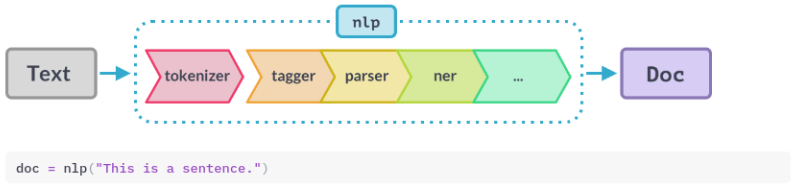

In [44]:
from IPython.display import Image
Image(filename = "spacy_funcionalidades_2.png")

* El objeto `nlp` aplica el tokenizer para convertir el string de texto a un objeto `Doc`. A continuación, una serie de componentes del pipeline se aplican al doc en orden. En este caso, el tagger, luego el parser, luego el entity recognizer. Finalmente, el doc procesado es devuelto para que puedas trabajar con él.

* El pipeline está definido en el `config.cfg` del modelo en el orden específico.
* `nlp.pipe_names`: lista de nombres de los componentes del pipeline que están en el objeto `nlp`<br>
* `nlp.pipeline`: lista de tuplas `(name, component)` con los nombres y funciones de cada componente que se aplican al doc para procesarlo y añadir atributos.

In [45]:
import spacy

# Carga el modelo pequeño
nlp = spacy.load("es_core_news_sm")

# Imprime una lista con los componentes del pipeline
print(nlp.pipe_names)

# Imprime una lista de tuplas (name, component)
print(nlp.pipeline)

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x7f0a3f9def40>), ('morphologizer', <spacy.pipeline.morphologizer.Morphologizer object at 0x7f0a4202e4a0>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x7f0a43615460>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x7f0a43549800>), ('lemmatizer', <spacy.lang.es.lemmatizer.SpanishLemmatizer object at 0x7f0a3ed07480>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x7f0a43307160>)]


## Componentes Personalizados

* Te permite adicionar añadir tu propia función al pipeline de spaCy que se ejecuta cuando llamas al objeto `nlp` sobre un texto.
* Son especialmente útiles para añadir tus propios metadatos a los documentos y a los tokens. También puedes usarlos para actualizar los atributos incluidos, como los spans de las entidades nombradas.
* Un componente es una función que toma un `doc`, lo modifica y lo devuelve para que sea procesado por el próximo componente en el pipeline. Es registrado usando el decorador `Language.component`.
* Puede especificar dónde añadir el componente en el pipeline: 
  * `last`: último lugar del pipeline (booleano)
  * `first`: primer lugar del pipeline justo después del tokenizer (booleano)
  * `before`, `after`: define el nombre de un componente existente al que se añadirá antes o después el nuevo componente.

```
import spacy
from spacy.language import Language

nlp = spacy.load("es_core_news_sm")

@Language.component("my_component")
def my_component_function(doc):
    # Realiza alguna cosa con el documento
    return doc

nlp.add_pipe("my_component")
```

In [46]:
import spacy
from spacy.language import Language

# Carga el modelo. Crea un objeto nlp
nlp = spacy.load("es_core_news_sm")

# Define el componente personalizado
@Language.component("length_component")
def length_component_function(doc):
    # Calcula el tamaño del doc    
    print(f"Este documento posee {len(doc)} tokens.")
    # Retorna el objeto doc
    return doc    
    
# Adiciona el componente al inicio del pipeline
nlp.add_pipe("length_component", first = True)

# Imprime los nombres de los componentes del pipeline
print("Pipeline:", nlp.pipe_names)

# Procesa un texto
doc = nlp("Hola mundo!")

Pipeline: ['length_component', 'tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
Este documento posee 3 tokens.


In [47]:
import spacy
from spacy.language import Language
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

nlp = spacy.load("es_core_news_sm")

planets = ["Mercurio", "Venus", "Tierra", "Marte", "Júpiter", "Saturno", "Urano", "Neptuno"]
planet_patterns = list(nlp.pipe(planets))
matcher = PhraseMatcher(nlp.vocab)
matcher.add("Planeta", None, *planet_patterns)

# Definir el componente personalizado
@Language.component("planet_component")
def planet_component(doc):
    # Aplicar el matcher al doc
    matches = matcher(doc)
    # Crear una partición para cada correspondencia y atribuir el rótulo "Planeta"
    spans = [Span(doc, start, end, label = "Planeta") for match_id, start, end in matches]
    # Sobrescribir doc.ents con las correspondencias 
    doc.ents = spans
    return doc

# Adicionar el componente al flujo de procesamiento después del componente "ner"
nlp.add_pipe("planet_component", after = "ner")
print(nlp.pipe_names)

# Procesar el texto e imprimir el texto y rótulo de doc.ents
doc = nlp("Tierra y Júpiter son mis planetas favoritos.")
print([(ent.text, ent.label_) for ent in doc.ents])

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'planet_component']
[('Tierra', 'Planeta'), ('Júpiter', 'Planeta')]


## Atributos Personalizados

* Te permiten añadir datos específicos a tus necesidades a los docs, tokens y spans. Pueden ser agregados una vez, o calculados dinámicamente.
* Son accesibles a través de la propiedad `._`, indicando que fueron adicionados por el usuario.
* Son registrados en los `Doc`, `Token` y `Span` usando el método `set_extension`.

```
# Importa las clases globales
from spacy.tokens import Doc, Token, Span

# Añade extensiones a los objetos Doc, Token e Span
Doc.set_extension("title", default = None)
Token.set_extension("is_color", default = False)
Span.set_extension("has_color", default = False)
```

**Tipos de extensiones**<br>

1. **Extensión de atributos**: Añade un valor por defecto que puede ser sobrescrito

In [48]:
import spacy
from spacy.tokens import Token

nlp = spacy.blank("es")

# Añade una extensión en el token con un valor por defecto
Token.set_extension("is_blue", default = False)

doc = nlp("El cielo es azul.")

# Sobrescribe el valor del atributo extendido
doc[3]._.is_blue = True
print(doc[3]._.is_blue)

True


In [49]:
import spacy
from spacy.tokens import Token

nlp = spacy.blank("es")

# Añade el atributo "is_nationality" con el valor por defecto como False
Token.set_extension("is_nationality", default = False)

# Procesa el texto 
doc = nlp("Soy peruana.")

# Coloca el atributo is_nationality con valor verdadero para el token "Perú"
doc[1]._.is_nationality = True

# Imprime el texto y el atributo is_nationality para todos los tokens
print([(token.text, token._.is_nationality) for token in doc])

[('Soy', False), ('peruana', True), ('.', False)]


2. **Extensión de propiedades**: 
  * Define una función getter que sólo es llamada cuando se consulta el valor del atributo. Esto permite calcular el valor dinámicamente, e inclusive puede tener en cuenta otros atributos personalizados.
  * Las funciones getter toman un argumento

In [50]:
import spacy
from spacy.tokens import Token

nlp = spacy.blank("es")

# Define una función getter 
def get_is_color(token):
    colors = ["celeste", "morado", "azul"]
    return token.text in colors

# Añade una extensión al token con la función getter
Token.set_extension("is_color", getter = get_is_color)

doc = nlp("El cielo es azul")
print(doc[3]._.is_color)
print(doc[1]._.is_color)

True
False


In [51]:
import spacy
from spacy.tokens import Span

nlp = spacy.blank("es")

# Define la función getter
def get_has_color(span):
    colors = ["morado", "celeste", "azul"]
    return any(token.text in colors for token in span)

# Añade una extensión en el Span con getter
Span.set_extension("has_color", getter = get_has_color)

doc = nlp("El cielo es azul.")
print(doc[1:4]._.has_color)
print(doc[0:2]._.has_color)

True
False


In [52]:
import spacy
from spacy.tokens import Token

nlp = spacy.blank("es")

# Define la función que recibe un token y retorna su contenido invertido
def get_reversed(token):
    return token.text[::-1]

# Registra el atributo extendido "reversed" con el argumento getter siendo la función get_reversed
Token.set_extension("reversed", getter = get_reversed)

# Procesa el texto e imprime el atributo "reversed" para cada token
doc = nlp("Tokens invertidos.")
for token in doc:
    print(token._.reversed)

snekoT
soditrevni
.


In [53]:
import spacy
from spacy.tokens import Doc

nlp = spacy.blank("es")

# Define la función para el atributo getter
def get_has_number(doc):
    # Retorna verdadero (True) si algún token del doc fuese número (token.like_num)
    return any(token.like_num for token in doc)

# Define la propriedad extendida "has_number" con el getter siendo get_has_number
Doc.set_extension("has_number", getter = get_has_number)

# Procesar el texto y verificar la propriedad has_number
doc = nlp("Hoy es día trece.")
print(doc._.has_number)

True


In [54]:
import spacy
from spacy.tokens import Span

nlp = spacy.load("es_core_news_sm")

def get_wikipedia_url(span):
    # Genera una URL de Wikipedia si el texto tuviera algún de los rótulos PERSON, ORG, GPE, LOC
    if span.label_ in ("PER", "ORG", "GPE", "LOC"):
        entity_text = span.text.replace(" ", "_")
        return "https://es.wikipedia.org/w/index.php?search=" + entity_text

# Define la propriedad extendida wikipedia_url usando el atributo getter con get_wikipedia_url
Span.set_extension("wikipedia_url", getter = get_wikipedia_url)

doc = nlp("Francisco Sagasti juró su cargo como presidente del Perú.")

for ent in doc.ents:
    # Imprime la entidad, label y URL de Wikipedia URL para la entidad
    print(ent.text, ent.label_, ent._.wikipedia_url)

Francisco Sagasti PER https://es.wikipedia.org/w/index.php?search=Francisco_Sagasti
Perú LOC https://es.wikipedia.org/w/index.php?search=Perú


3. **Extensión de métodos**: 
  * Asigna una **función** que pasa a estar disponible como método de un objeto
  * Puedes pasarle uno o más argumentos y calcular los valores del atributo de manera dinámica.
  * El primer argumento del método es siempre el objeto en sí, es pasado automáticamente cuando se llama al método. Los demás argumentos de la función serán argumentos en la extensión del método.

In [55]:
import spacy
from spacy.tokens import Doc

nlp = spacy.blank("es")

# Define un método con argumentos
def has_token(doc, token_text):
    in_doc = token_text in [token.text for token in doc]
    return in_doc

# Añade una extensión en el Doc con el método
Doc.set_extension("has_token", method = has_token)

doc = nlp("El cielo es azul")
print(doc._.has_token("cielo"))
print(doc._.has_token("mar"))

True
False


In [56]:
import spacy
from spacy.tokens import Span

nlp = spacy.blank("es")

# Define la función
def to_html(span, tag):
    # Envuelva el texto con una tag HTML y retorne como resultado
    return f"<{tag}>{span.text}</{tag}>"

# Define el método extendido para la partición (Span) "to_html" con la función to_html
Span.set_extension("to_html", method = to_html)

# Procesa el texto y llama el método to_html para la partición span pasando el argumento "title" 
doc = nlp("Aprendiendo NLP")
span = doc[0:2]
print(span._.to_html("title"))

<title>Aprendiendo NLP</title>


**Ejemplo de componente y atributo personalizados**

In [57]:
import spacy
from spacy.tokens import Span
from spacy.matcher import PhraseMatcher
from spacy.language import Language

nlp = spacy.blank("es")

matcher = PhraseMatcher(nlp.vocab)
matcher.add("Pais", None, *list(nlp.pipe(["Perú", "Venezuela", "Colombia", "Chile", 
                                          "Ecuador", "Brasil", "Bolivia", "México"])))

@Language.component("countries_component")
def countries_component(doc):
    # Crear una partición con el rótulo "GPE" para todas las correspondencias
    matches = matcher(doc)
    doc.ents = [Span(doc, start, end, label = "GPE") for match_id, start, end in matches]
    return doc

# Adicionar el componente al flujo de procesamiento (pipeline)
nlp.add_pipe("countries_component")
print(nlp.pipe_names)

# Crear una función getter que compara el texto con un diccionario con países y sus capitales
get_capital = lambda span: {"Perú": "Lima", "Brasil": "Brasilia", "México": "Ciudad de México", 
                            "Bolivia": "Sucre", "Ecuador": "Quito", "Colombia": "Bogotá",
                            "Chile": "Santiago de Chile", "Venezuela": "Caracas"}.get(span.text)

# Definir la propriedad extendida "capital" con el atributo getter get_capital
Span.set_extension("capital", getter = get_capital)

# Procesar el texto e imprimir el texto de la entidad, rótulo (label) y la propriedad extendida capital
doc = nlp("Perú vs. Venezuela se enfrentaron en el estadio Olímpico UCV de Caracas "
          "por la decimocuarta jornada de las Eliminatorias Qatar 2022.")
print([(ent.text, ent.label_, ent._.capital) for ent in doc.ents])

['countries_component']
[('Perú', 'GPE', 'Lima'), ('Venezuela', 'GPE', 'Caracas')]


## Aumentando la Escala y el Desempeño

**nlp.pipe**

* Si necesitas procesar una gran cantidad de textos y crear muchos objetos `Doc`seguidos, usa el método `nlp.pipe`. Es mucho más rápido que sólo llamar al objeto `nlp` sobre cada texto, porque procesa en batches los textos.
* `nlp.pipe` es un generador que usa `yield`para devolver objetos `Doc`, así que para obtener una lista de `Doc`recuerda llamar la función `list` sobre él.

`docs = [nlp(text) for text in LOTS_OF_TEXTS] --> docs = list(nlp.pipe(LOTS_OF_TEXTS))`

In [58]:
import spacy

nlp = spacy.load("es_core_news_sm")

TEXTS = ["Primer comentario...", "Imagine que es el N-ésimo comentario"]

# Procesa los textos e imprime los sustantivos
for doc in nlp.pipe(TEXTS):
    print([token.text for token in doc if token.pos_ == "NOUN"])

['comentario']
['comentario']


In [59]:
import spacy

nlp = spacy.load("es_core_news_sm")

TEXTS = ["Carl Sagan fue un divulgador científico estadounidense.", 
         "El rostro de Pedro Paulet se luce en el nuevo billete de 100 soles."]
    
# Procesa los textos e imprime las entidades
docs = list(nlp.pipe(TEXTS))
entities = [doc.ents for doc in docs]
print(*entities)

(Carl Sagan,) (Pedro Paulet,)


**Passando el contexto**

* `nlp.pipe` también provee soporte para pasar tuplas `(texto, contexto)` si defines `as_tuples` como `True`
* Esto es útil para pasar metadatos adicionales, como un ID asociado con el texto o con el número de página
* Inclusive puedes pasarle metadatos a los atributos personalizados

In [60]:
import spacy

nlp = spacy.blank("es")

data = [("Primer texto", {"id": 1, "page_number": 11, "book": "Mastering spaCy", "author": "Duygu"}),
        ("Segundo texto", {"id": 2, "page_number": 12, "book": "NLP", "author": "Peter"})]

for doc, context in nlp.pipe(data, as_tuples = True):
    print(doc.text, context["id"], context["page_number"], context["book"], context["author"])

Primer texto 1 11 Mastering spaCy Duygu
Segundo texto 2 12 NLP Peter


In [61]:
import spacy
from spacy.tokens import Doc

nlp = spacy.blank("es")

# Registramos dos extensiones
Doc.set_extension("id", default = None)
Doc.set_extension("page_number", default = None)

data = [("This is a text", {"id": 1, "page_number": 15}),
        ("And another text", {"id": 2, "page_number": 16})]

# Sobrescribimos las extensiones del doc con nuestros metadatos del contexto
for doc, context in nlp.pipe(data, as_tuples = True):
    doc._.id = context["id"]
    print(doc._.id)
    doc._.page_number = context["page_number"]
    print(doc._.page_number)

1
15
2
16


In [62]:
import spacy
from spacy.tokens import Doc

nlp = spacy.blank("es")

DATA = [["Para sobrevivirme te forjé como un arma, como una flecha en mi arco, como una piedra en mi honda.", 
         {"author": "Pablo Neruda", "book": "20 Poemas de amor y una canción desesperada"}], 
        ["La Tierra es redonda como una naranja.", 
         {"author": "Gabriel García Márquez", "book": "Cien años de soledad"}]]

# Definir a propriedade customizada do Doc: "author" (default None)
Doc.set_extension("author", default = None)

# Definir a propriedade customizada do Doc: "book" (default None)
Doc.set_extension("book", default = None)

for doc, context in nlp.pipe(DATA, as_tuples = True):
    # Definir las propriedades doc._.book e doc._.author a partir del contexto
    doc._.book = context["book"]
    doc._.author = context["author"]

    # Imprimir el texto y las propiedades personalizadas
    print(f"{doc.text}\n — '{doc._.book}' by {doc._.author}\n")

Para sobrevivirme te forjé como un arma, como una flecha en mi arco, como una piedra en mi honda.
 — '20 Poemas de amor y una canción desesperada' by Pablo Neruda

La Tierra es redonda como una naranja.
 — 'Cien años de soledad' by Gabriel García Márquez



**Usando sólo el toquenizador**

* Si sólo necesitas el tokenizer correr todo el pipeline es innecesariamente lento, porque estarás obteniendo muchas predicciones del modelo que no necesitas
* `nlp.make_doc` convierte el texto en un doc

`doc = nlp("Hello world") --> doc = nlp.make_doc("Hello world!")`

In [63]:
import spacy

nlp = spacy.load("es_core_news_sm")
text = ("Este es un ejemplo.")

# Apenas toquenizar el texto
doc = nlp.make_doc(text)
print([token.text for token in doc])

['Este', 'es', 'un', 'ejemplo', '.']


**Desactivando los componentes del pipeline**

* Usa `nlp.disable_pipes` para deshabilitar temporalmente uno o más componentes del pipeline. Ejemplo:

```
# Desactiva el tagger y el parser
with nlp.disable_pipes("lemmatizer", "parser"):
    # Procesa el texto e imprime las entidades
    doc = nlp(text)
    print(doc.ents)
```    

después del bloque `with`, los componentes del pipeline deshabilitados se restauran automáticamente.

In [64]:
import spacy

nlp = spacy.load("es_core_news_sm")
text = "Este es un ejemplo."

# Desabilita el lemmatizer y ner
with nlp.disable_pipes("lemmatizer", "ner"): 
    # Procesa el texto
    doc = nlp(text)
    # Imprime las entidades del doc
    print(doc[0].pos_)

PRON


## Referencias

Este contenido está basado en el curso de spaCy.

- https://course.spacy.io/en/
- https://spacy.io/
- https://github.com/explosion/spaCy
- https://explosion.ai/blog
- https://www.youtube.com/c/ExplosionAI
- Libro: “Mastering spaCy”